In [1]:
import pandas as pd 
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import Draw

In [2]:
df = pd.read_csv("dataset_clean.csv")
df.head()

,Molecule ChEMBL ID,#RO5 Violations,label,smiles
0,CHEMBL4750575,1,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...
1,CHEMBL4744119,0,1,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...
2,CHEMBL4760194,0,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...
3,CHEMBL3427565,1,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O
4,CHEMBL307856,0,1,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC


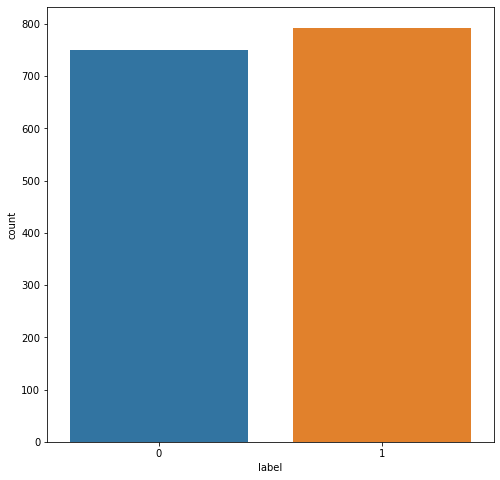

1    793
0    751
Name: label, dtype: int64


In [3]:
plt.figure(figsize=(8,8))
sns.countplot(x="label",data=df)
plt.show()
print(df["label"].value_counts())

**The dataset is comprised of 793 actives and 751 inactives which represent a Balanced dataset.**

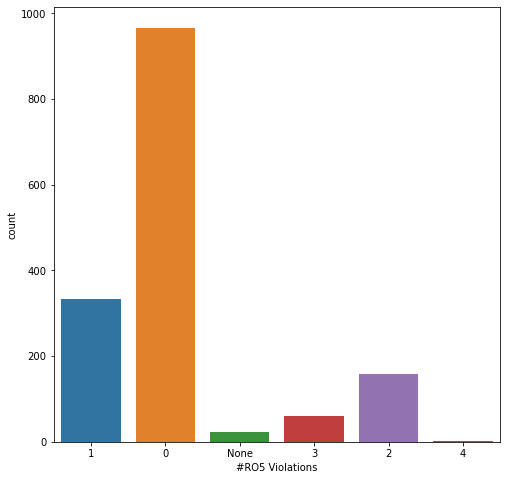

In [4]:
plt.figure(figsize=(8,8))
sns.countplot(x="#RO5 Violations",data=df)
plt.show()


In [5]:
PandasTools.AddMoleculeColumnToFrame(frame=df,smilesCol="smiles",molCol="Mol")

,Molecule ChEMBL ID,#RO5 Violations,label,smiles,Mol
0,CHEMBL4750575,1,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,
1,CHEMBL4744119,0,1,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,
2,CHEMBL4760194,0,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,
3,CHEMBL3427565,1,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,
4,CHEMBL307856,0,1,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,

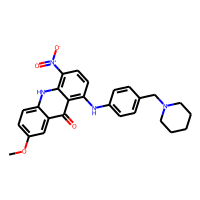
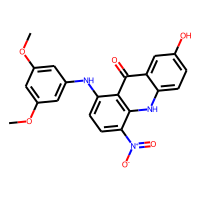
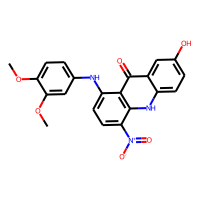
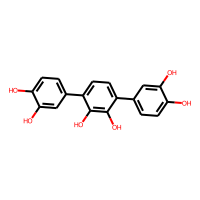
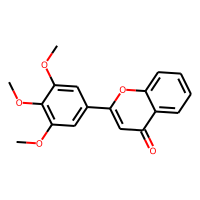

In [6]:
df.head()

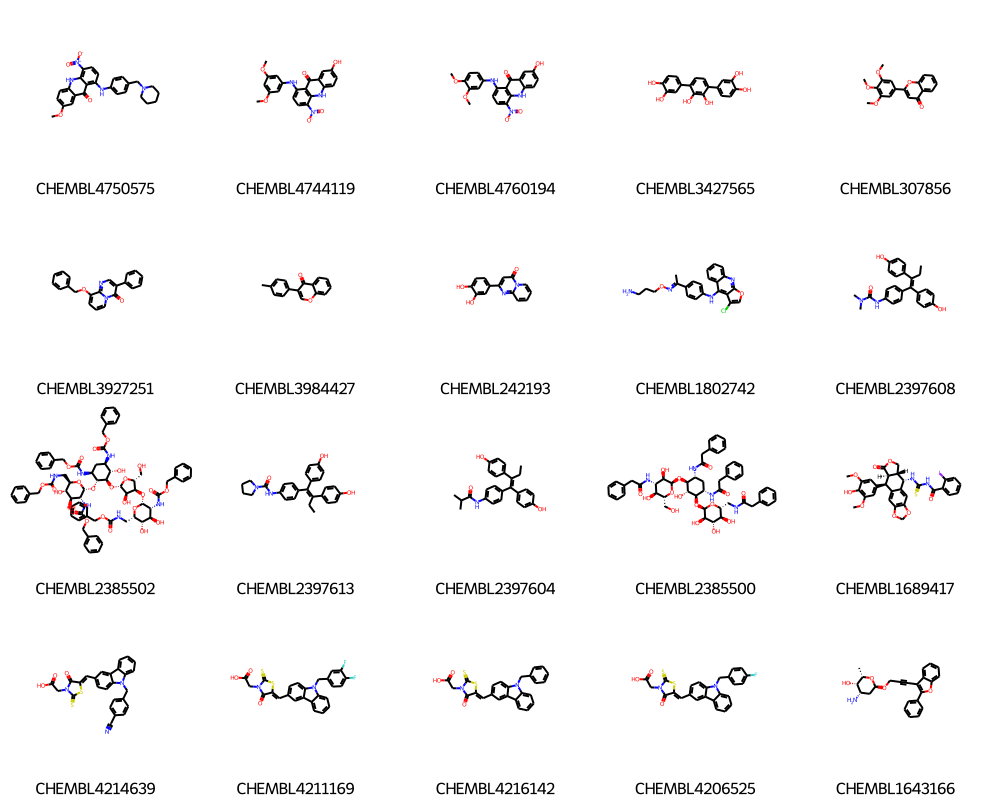

In [7]:
Draw.MolsToGridImage(df["Mol"].head(20),molsPerRow=5,legends=list(df["Molecule ChEMBL ID"].head(20)))

### **Chemical Space Analysis**

In [8]:
df["Molwt"] = df["Mol"].apply(Descriptors.MolWt)
df["LogP"] = df["Mol"].apply(Descriptors.MolLogP)
df["HBA"] = df["Mol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["Mol"].apply(Descriptors.NumHDonors)

,Molecule ChEMBL ID,#RO5 Violations,label,smiles,Mol,Molwt,LogP,HBA,HBD
0,CHEMBL4750575,1,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",458.518,5.3276,6,2
1,CHEMBL4744119,0,1,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",407.382,4.0559,7,3
2,CHEMBL4760194,0,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",407.382,4.0559,7,3
3,CHEMBL3427565,1,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",326.304,3.2542,6,6
4,CHEMBL307856,0,1,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",312.321,3.4858,5,0

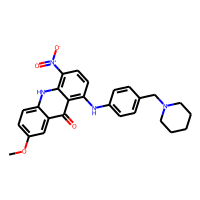
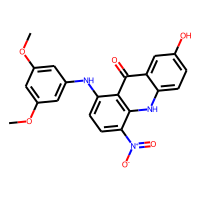
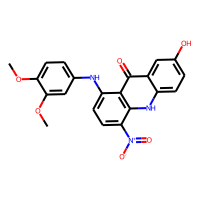
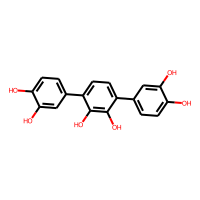
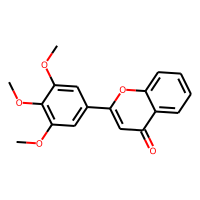

In [9]:
df.head()

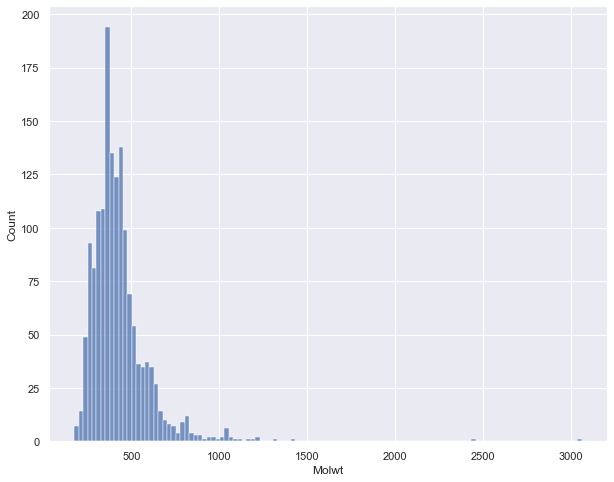

In [10]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.histplot(x=df["Molwt"])
plt.show()

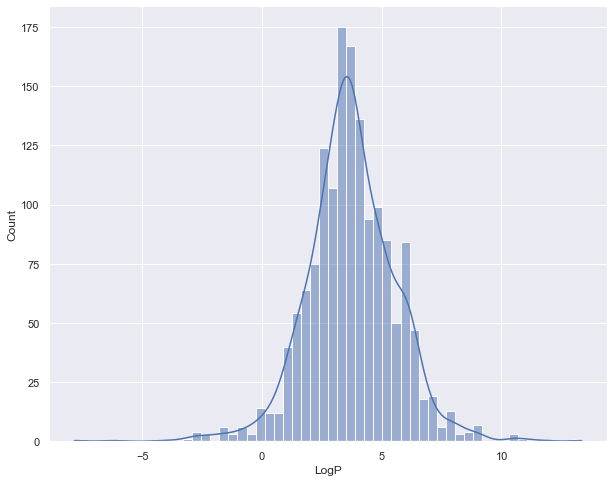

In [11]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.histplot(x=df["LogP"],kde=True)
plt.show()

<AxesSubplot:xlabel='label', ylabel='Molwt'>

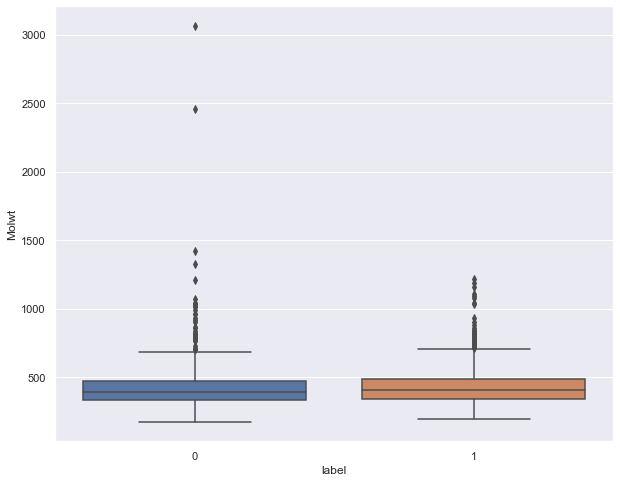

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x="label",y="Molwt",data=df)

**Actives and inactives almost share smilar MolWt.**

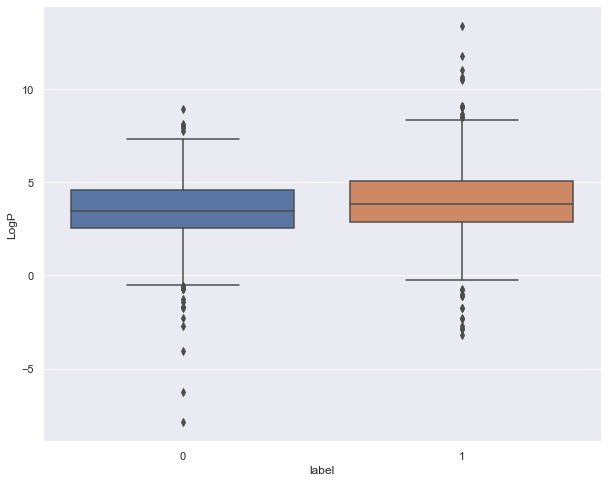

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x="label",y="LogP",data=df)
plt.show()

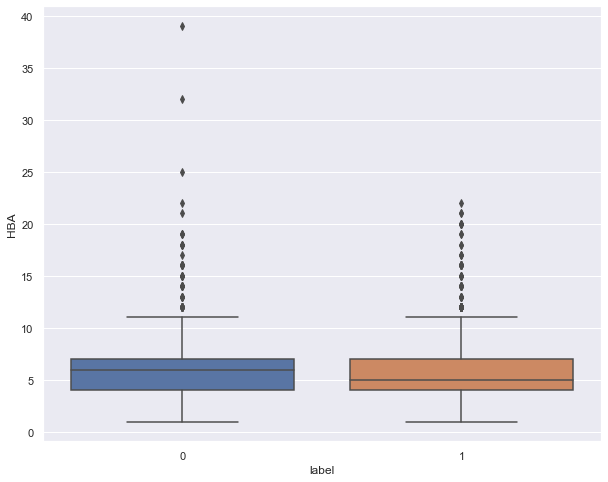

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x="label",y="HBA",data=df)
plt.show()

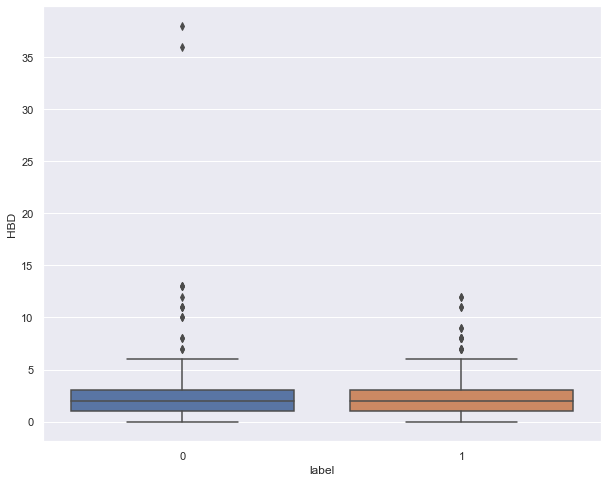

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x="label",y="HBD",data=df)
plt.show()

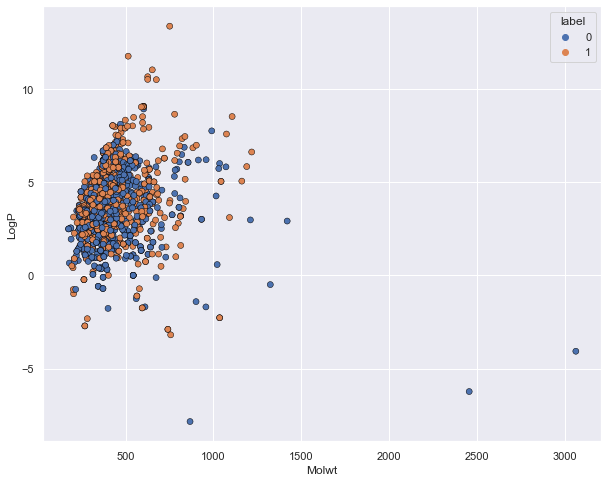

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Molwt",y="LogP",data=df,edgecolor="black",hue="label")
plt.show()

**Actives and Inactives share similar properties.**

### Molecular Descriptors

In the paper, 8 sets of molecular descriptors were generated inlcuding MACCS Keys, Morgan fingerprints and a set of physicochemical descriptors. Here we will generate 3 sets, MACCS keys, Morgan FP (radius 2) and Morgan FP using invariant.The feature based invariant of Morgan fingerprint (employed in the model development), considers the pharmacophoric features like atomic number, degree, number of hydrogen atoms, formal charge, isotopic mass and ring membership). 



In [38]:
maccs = []
for mol in df["Mol"]:
    maccs.append(AllChem.GetMACCSKeysFingerprint(mol))

In [41]:
maccs = pd.DataFrame(np.asarray(maccs,dtype=np.int32))

In [42]:
maccs.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0


In [44]:
#Morgan Fingerprint
mfp = []
for mol in df["Mol"]:
    mfp.append(AllChem.GetMorganFingerprintAsBitVect(mol,2,1024))

In [45]:
mfp = pd.DataFrame(np.asarray(mfp,dtype=np.int32))

In [46]:
mfp.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
## Feature based Morgan FP
fcfp = []
for mol in df["Mol"]:
    fcfp.append(AllChem.GetMorganFingerprintAsBitVect(mol,2,1024,useFeatures=True))

In [48]:
fcfp = pd.DataFrame(np.asarray(fcfp,dtype=np.int32))

In [49]:
fcfp.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
maccs["label"] = df["label"]

In [51]:
maccs

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,label
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,1
1540,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,1
1541,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
1542,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1


In [ ]:
mfp["label"] = df["label"]

In [52]:
fcfp["label"] = df["label"]

In [53]:
maccs.to_csv("maccs.csv",index=None)

In [54]:
mfp.to_csv("mfp.csv",index=None)

In [55]:
fcfp.to_csv("fcfp.csv",index=None)